In [1]:
#coding:utf-8
import random
import os
import numpy as np
import json

## 从json中生成EAST标签

In [2]:
def json2txt(json_path,txt_path):
    with open(json_path,'r') as jsonfp:
        json_content=json.load(jsonfp)
        with open(txt_path,'w+') as txtfp:
            for shape in json_content['shapes']:           
                xy=np.array(shape['points'])
                label=str(shape['label'])
                strxy = ''
                for m,n in xy:
                    m=int(m)
                    n=int(n)
                    strxy += str(m)+','+str(n)+','
                strxy+=label
                print(strxy)                                             
                txtfp.writelines(strxy+"\n")      

In [3]:
json_dir =r'Z:\Code\Python\datas\DMFIVE\json'
txt_dir =r'Z:\Code\Python\datas\DMFIVE\txt'
json_list = os.listdir(json_dir)
len(json_list)

94

In [4]:
for cnt,json_name in enumerate(json_list):
    print('cnt= %d,name= %s'%(cnt,json_name))
    json_path = os.path.join(json_dir ,json_name)
    txt_path = os.path.join(txt_dir,json_name.replace('.json','.txt'))
    print(json_path,txt_path)    
    json2txt(json_path,txt_path)

cnt= 0,name= DM1_000.json
Z:\Code\Python\datas\DMFIVE\json\DM1_000.json Z:\Code\Python\datas\DMFIVE\txt\DM1_000.txt
302,104,431,124,420,189,290,170,-14.2
cnt= 1,name= DM1_001.json
Z:\Code\Python\datas\DMFIVE\json\DM1_001.json Z:\Code\Python\datas\DMFIVE\txt\DM1_001.txt
297,106,430,123,420,188,285,173,-02.1
cnt= 2,name= DM1_002.json
Z:\Code\Python\datas\DMFIVE\json\DM1_002.json Z:\Code\Python\datas\DMFIVE\txt\DM1_002.txt
300,103,437,121,422,191,289,171,-02.0
cnt= 3,name= DM1_003.json
Z:\Code\Python\datas\DMFIVE\json\DM1_003.json Z:\Code\Python\datas\DMFIVE\txt\DM1_003.txt
299,105,435,123,422,190,288,172,-02.0
cnt= 4,name= DM1_004.json
Z:\Code\Python\datas\DMFIVE\json\DM1_004.json Z:\Code\Python\datas\DMFIVE\txt\DM1_004.txt
299,106,434,124,423,185,289,170,-02.1
cnt= 5,name= DM1_005.json
Z:\Code\Python\datas\DMFIVE\json\DM1_005.json Z:\Code\Python\datas\DMFIVE\txt\DM1_005.txt
299,104,432,123,422,190,288,169,-02.1
cnt= 6,name= DM1_006.json
Z:\Code\Python\datas\DMFIVE\json\DM1_006.json Z:\C

## EAST标签格式转化为CRNN标签格式
### EAST标签格式为[x1,y1,x2,y2,x3,y3,x4,y4,label]
### CRNN标签格式为[***.jpg label]

In [ ]:
east_txt_dir=r'Z:\Code\Python\datas\meter512\east_txt'
crnn_txt_dir=r'Z:\Code\Python\datas\meter512\crnn_txt'
east_txt_list=os.listdir(east_txt_dir)  #***.txt

In [ ]:
with open('crnn_all_labels.txt','w') as labels:
    for east_txt in east_txt_list:
        with open(os.path.join(east_txt_dir,east_txt),'r') as t1:
            label=t1.readline()
            crnn_txt=str(os.path.splitext(east_txt)[0]+'.jpg')+' '+str(label.split(',')[-1])
            with open(os.path.join(crnn_txt_dir,east_txt),'w+')as t2:
                t2.write(crnn_txt)
                labels.write(crnn_txt)
                print(crnn_txt)

## CRNN 训练集验证集生成

In [ ]:
crnn_imgs_path=r'Z:\Code\Python\datas\meter512\crnn_imgs'
crnn_imgs=os.listdir(crnn_imgs_path)
len(crnn_imgs)

In [ ]:
crnn_lable=[]
for crnn_img in crnn_imgs:
    with open(os.path.join(crnn_txt_dir,crnn_img.replace('.jpg','.txt')),'r') as txt:
        crnn_txt=txt.readline()
        crnn_lable.append(crnn_txt)
print(len(crnn_lable))

In [ ]:
random.shuffle(crnn_lable)
len(crnn_lable)

In [ ]:
crnn_train_txt=r'Z:\Code\Python\datas\meter512\crnn_train.txt'
crnn_val_txt=r'Z:\Code\Python\datas\meter512\crnn_val.txt'

In [ ]:
val_split_ratio = 0.2

crnn_train=crnn_lable[:int(len(crnn_lable)*(1-val_split_ratio))]
with open(crnn_train_txt,'w+') as train_txt:
    train_txt.writelines(crnn_train)
crnn_val=crnn_lable[int(len(crnn_lable)*(1-val_split_ratio)):]
with open(crnn_val_txt,'w+') as val_txt:
    val_txt.writelines(crnn_val)    

## 标签缩放

In [ ]:
east_txt_dir=r'Z:\Code\Python\datas\Augment_meter\east_txt'
crnn_txt_dir=r'Z:\Code\Python\datas\Augment_meter\txt_crnn'
east_txt_list=os.listdir(east_txt_dir)  #***.txt

In [ ]:
def scale(origin_txt,new_txt):
    with open(origin_txt) as origintxt:
        n=[]
        line=origintxt.readline()
        new=line.split(',')[:-1]
        num=line.split(',')[-1]
        for i in new :
            i=float(i)*512/1280
            i=str(i)
            n.append(i)
        with open(new_txt,'w')as txt:
            #for nn in n:
                #print(nn)
            newline =n[0]+','+n[1]+','+n[2]+','+n[3]+','+n[4]+','+n[5]+','+n[6]+','+n[7]+','+str(num)
            print(newline)
            txt.writelines(newline)

In [ ]:
for origin_txt in east_txt_list:
    scale(os.path.join(east_txt_dir,origin_txt),os.path.join("scale_txt_dir",origin_txt))

In [36]:
import  tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import glob
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

input_path = glob.glob(r'Z:\Code\Python\datas\meter512\images\*.jpg') # 图片的路径
label_path = glob.glob(r'Z:\Code\Python\datas\meter512\labels_east_512\*_gt.npy') # 图片的路径
len(input_path)
len(label_path)

1000

In [ ]:
img = image.load_img(input_path[0],target_size=(512,512))  
img = image.img_to_array(img)
img = preprocess_input(img,mode='tf')# -1~1,float32
img.shape

In [ ]:
plt.imshow((img+1)/2)

In [ ]:
t=np.load(label_path[0])
plt.imshow(t[:,:,:3])

In [ ]:
gt_file = os.path.join(label_path[0])
y = np.load(gt_file)
y.shape

In [ ]:
input_path[0]

In [13]:
imgs=[]

In [54]:
for img_path in input_path:
    img = image.load_img(img_path,target_size=(512,512))  
    img = image.img_to_array(img)
    img = preprocess_input(img,mode='tf')
    imgs.append(img)

In [49]:
img = image.load_img(img_path,target_size=(512,512))  
img = image.img_to_array(img)
img = preprocess_input(img,mode='tf')

In [53]:
x_train = tf.data.Dataset.from_tensor_slices(imgs)
next(iter(x_train))

<tf.Tensor: shape=(512, 3), dtype=float32, numpy=
array([[ 0.0196079 ,  0.20000005,  0.32549024],
       [-0.02745098,  0.15294123,  0.27843142],
       [-0.05098039,  0.12941182,  0.254902  ],
       ...,
       [ 0.6156863 ,  0.78039217,  0.9137255 ],
       [ 0.6156863 ,  0.78039217,  0.9137255 ],
       [ 0.60784316,  0.77254903,  0.90588236]], dtype=float32)>

In [10]:
def load_preprosess_image(input_path):
    img = image.load_img(input_path,target_size=(512,512))  
    img = image.img_to_array(img)
    img = preprocess_input(img,mode='tf')
    return img 
    

In [ ]:
def load_preprosess_label(input_path,label_path):
   
    img = image.load_img(input_path,target_size=(512,512))  
    img = image.img_to_array(img)
    img = preprocess_input(img,mode='tf')
    label = np.load(label_path)
    return img ,label # return回的都是一个batch一个batch的 ， 一个批次很多张
   

In [ ]:
img,lab =load_preprosess_image(input_path[0],label_path[0])

In [11]:
x_train = tf.data.Dataset.from_tensor_slices(input_path)#用load_preprosess_image对图片做一个读取预处理 速度有些慢
x_train= x_train.map(load_preprosess_image)  #.map是使函数应用在load_preprosess_image中所有的图像上 

TypeError: in user code:

    <ipython-input-10-1cd5a3eff245>:2 load_preprosess_image  *
        img = image.load_img(input_path,target_size=(512,512))
    C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:113 load_img  *
        with open(path, 'rb') as f:

    TypeError: expected str, bytes or os.PathLike object, not Tensor


In [ ]:
imgs,las = next(iter(train_dataset)) #取出的是一个batch个数的图片 shape = (batch_size,256,256,3)
imgs,las

In [ ]:

BATCH_SIZE = 2
train_count = len(input_path)
    
train_dataset = train_dataset.shuffle(train_count).batch(BATCH_SIZE)

imgs,las = next(iter(train_dataset)) #取出的是一个batch个数的图片 shape = (batch_size,256,256,3)
    
plt.imshow(imgs[1]) # 展示我们读到的图像 
plt.show() 


In [48]:
x=tf.zeros((100,512,512,3))
x[0]==load_preprosess_image(input_path[0])

ResourceExhaustedError: OOM when allocating tensor with shape[100,512,512,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Fill]

In [ ]:
plt.imshow(x)

In [45]:
def load_preprosess_image(input_path):
    image = tf.io.read_file(input_path) # 读取的是二进制格式 需要进行解码
    print(input_path)
    image = tf.image.decode_jpeg(image,channels=3)  # 解码 是通道数为3
    image = tf.image.resize(image,[256,256]) # 统一图片大小
    image = tf.cast(image,tf.float32) # 转换类型
    image = image/255 # 归一化
    return image  # return回的都是一个batch一个batch的 ， 一个批次很多张
train_dataset = tf.data.Dataset.from_tensor_slices((input_path))#用load_preprosess_image对图片做一个读取预处理 速度有些慢
train_dataset = train_dataset.map(load_preprosess_image)  #.map是使函数应用在load_preprosess_image中所有的图像上 

Tensor("args_0:0", shape=(), dtype=string)


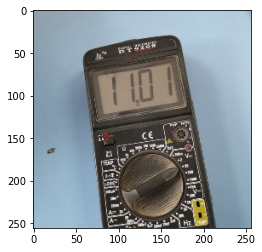

In [41]:
x=next(iter(train_dataset))
plt.imshow(x)

In [ ]:
import  tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import glob
import matplotlib.pyplot as plt

input_path = glob.glob('D:/PycharmProjects/testSave/TrainData/input/*.jpg') # 图片的路径
label_path = glob.glob('D:/PycharmProjects/testSave/TrainData/label/*.jpg') # 图片的路径

def load_preprosess_image(input_path,label_path):
    image = tf.io.read_file(input_path) # 读取的是二进制格式 需要进行解码
    image = tf.image.decode_jpeg(image,channels=3)  # 解码 是通道数为3
    image = tf.image.resize(image,[256,256]) # 统一图片大小
    image = tf.cast(image,tf.float32) # 转换类型
    image = image/255 # 归一化
    
    label = tf.io.read_file(label_path)
    label = tf.image.decode_jpeg(label, channels=3)  # 解码 是通道数为3
    label = tf.image.resize(label, [256, 256])  # 统一图片大小
    label = tf.cast(label, tf.float32)  # 转换类型
    label = label / 255  # 归一化

    return image ,label # return回的都是一个batch一个batch的 ， 一个批次很多张
    
train_dataset = tf.data.Dataset.from_tensor_slices((input_path,label_path))#用load_preprosess_image对图片做一个读取预处理 速度有些慢
    
AUTOTUNE = tf.data.experimental.AUTOTUNE #根据计算机cpu的个数自动的做并行运算  临时实验方法 有可能变化
    
train_dataset = train_dataset.map(load_preprosess_image,num_parallel_calls=AUTOTUNE)  #.map是使函数应用在load_preprosess_image中所有的图像上 
    
BATCH_SIZE = 2
train_count = len(input_path)
    
train_dataset = train_dataset.shuffle(train_count).batch(BATCH_SIZE)
    
train_dataset = train_dataset.prefetch(AUTOTUNE) #前台在训练时 后台读取数据 自动分配cpu
    
imgs,las = next(iter(train_dataset)) #取出的是一个batch个数的图片 shape = (batch_size,256,256,3)
    
plt.imshow(imgs[1]) # 展示我们读到的图像 
plt.show() 
